# Joining Data in Pandas

## 1. Data Merging Basics

### Your first inner join
You have been tasked with figuring out what the most popular types of fuel used in Chicago taxis are. To complete the analysis, you need to merge the taxi_owners and taxi_veh tables together on the vid column. You can then use the merged table along with the .value_counts() method to find the most common fuel_type.

In [1]:
# import taxi_owners.p and taxi_vehicles.p pickled files
#import pandas
import pandas as pd

#load pickle data files
taxi_owners = pd.read_pickle('taxi_owners.p')
taxi_veh = pd.read_pickle('taxi_vehicles.p')

print(taxi_owners.head())
print(taxi_veh.head())

# Merge the taxi_owners and taxi_veh tables
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid')

# Print the column names of the taxi_own_veh
print(taxi_own_veh.columns)

     rid   vid           owner                 address    zip
0  T6285  6285  AGEAN TAXI LLC     4536 N. ELSTON AVE.  60630
1  T4862  4862    MANGIB CORP.  5717 N. WASHTENAW AVE.  60659
2  T1495  1495   FUNRIDE, INC.     3351 W. ADDISON ST.  60618
3  T4231  4231    ALQUSH CORP.   6611 N. CAMPBELL AVE.  60645
4  T5971  5971  EUNIFFORD INC.     3351 W. ADDISON ST.  60618
    vid    make   model  year fuel_type                owner
0  2767  TOYOTA   CAMRY  2013    HYBRID       SEYED M. BADRI
1  1411  TOYOTA    RAV4  2017    HYBRID          DESZY CORP.
2  6500  NISSAN  SENTRA  2019  GASOLINE       AGAPH CAB CORP
3  2746  TOYOTA   CAMRY  2013    HYBRID  MIDWEST CAB CO, INC
4  5922  TOYOTA   CAMRY  2013    HYBRID       SUMETTI CAB CO
Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')


In [2]:
# Set the left and right table suffixes for overlapping columns of the merge to _own and _veh, respectively.
# The suffix is needed only when the merged dataframe has two columns with same name.
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own', '_veh'))

# Print the column names of taxi_own_veh
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')


In [3]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own','_veh'))

# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())

fuel_type
HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: count, dtype: int64


### Inner joins and number of rows returned
All of the merges you have studied to this point are called inner joins. It is necessary to understand that inner joins only return the rows with matching values in both tables. You will explore this further by reviewing the merge between the wards and census tables, then comparing it to merges of copies of these tables that are slightly altered, named wards_altered, and census_altered. The first row of the wards column has been changed in the altered tables. You will examine how this affects the merge between them. The tables have been loaded for you.

For this exercise, it is important to know that the wards and census tables start with 50 rows.

In [4]:
#import pickle ward and census data files
wards = pd.read_pickle('ward.p')
census = pd.read_pickle('census.p')

In [5]:
print(wards.head())
print(wards.shape)

  ward            alderman                          address    zip
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622
2    3          Pat Dowell          5046 SOUTH STATE STREET  60609
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
4    5  Leslie A. Hairston            2325 EAST 71ST STREET  60649
(50, 4)


In [6]:
print(census.head())
print(census.shape)

  ward  pop_2000  pop_2010 change                                  address  \
0    1     52951     56149     6%              2765 WEST SAINT MARY STREET   
1    2     54361     55805     3%                 WM WASTE MANAGEMENT 1500   
2    3     40385     53039    31%                      17 EAST 38TH STREET   
3    4     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL   
4    5     55302     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE   

     zip  
0  60647  
1  60622  
2  60653  
3  60653  
4  60637  
(50, 6)


In [7]:
# Merge the wards and census tables on the ward column
wards_census = wards.merge(census, on = 'ward')

# Print the shape of wards_census
print('wards_census table shape:', wards_census.shape)

wards_census table shape: (50, 9)


### One-to-many classification
The hypothetical tables are the following:


- A customer table with information about each customer
- A cust_tax_info table with customers unique tax IDs
- An orders table with information about each order
- A products table with details about each unique product sold
- An inventory table with information on how much total inventory is available to sell for each product

One-to-one:

- Realtionwhip between products and inventory
- Relationship between customer and cust_tax_info

One-to-many:

- Relationship between customers and orders
- Relationship between products and orders

### One-to-many merge
A business may have one or multiple owners. In this exercise, you will continue to gain experience with one-to-many merges by merging a table of business owners, called biz_owners, to the licenses table. Recall from the video lesson, with a one-to-many relationship, a row in the left table may be repeated if it is related to multiple rows in the right table. In this lesson, you will explore this further by finding out what is the most common business owner title. (i.e., secretary, CEO, or vice president)

In [8]:
#import licenses and business_owners pickle files to df
licenses = pd.read_pickle('licenses.p')
biz_owners = pd.read_pickle('business_owners.p')

print(licenses.head())
print(biz_owners.head())

  account ward  aid                   business               address    zip
0  307071    3  743       REGGIE'S BAR & GRILL       2105 S STATE ST  60616
1      10   10  829                 HONEYBEERS   13200 S HOUSTON AVE  60633
2   10002   14  775                CELINA DELI     5089 S ARCHER AVE  60632
3   10005   12  NaN  KRAFT FOODS NORTH AMERICA        2005 W 43RD ST  60609
4   10044   44  638  NEYBOUR'S TAVERN & GRILLE  3651 N SOUTHPORT AVE  60613
  account first_name  last_name      title
0      10      PEARL    SHERMAN  PRESIDENT
1      10      PEARL    SHERMAN  SECRETARY
2   10002     WALTER     MROZEK    PARTNER
3   10002     CELINA     BYRDAK    PARTNER
4   10005      IRENE  ROSENFELD  PRESIDENT


In [9]:
# Starting with the licenses table on the left, merge it to the biz_owners table on the column account, and save the results to a variable named licenses_owners.
licenses_owners = licenses.merge(biz_owners, on = 'account')

# Group licenses_owners by title and count the number of accounts for each title. Save the result as counted_df
counted_df = licenses_owners.groupby('title').agg({'account':'count'})

# Sort counted_df by the number of accounts in descending order, and save this as a variable named sorted_df.
sorted_df = counted_df.sort_values('account', ascending = False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())

                 account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970


### Total riders in a month
Your goal is to find the total number of rides provided to passengers passing through the Wilson station (station_name == 'Wilson') when riding Chicago's public transportation system on weekdays (day_type == 'Weekday') in July (month == 7). Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is provided.

In [10]:
from IPython.display import Image
Image(url='https://assets.datacamp.com/production/repositories/5486/datasets/56b5ecb2edcdc896c69effdf05ef65e5454ff996/cta_L_diagram.png')

In [11]:
#iumport cta_ridership.p, stations.p and cta_calendar.p files
ridership = pd.read_pickle('cta_ridership.p')
cal = pd.read_pickle('cta_calendar.p')
stations = pd.read_pickle('stations.p')

In [12]:
# Merge the ridership and cal tables together, starting with the ridership table on the left and save the result to the variable ridership_cal. If you code takes too long to run, your merge conditions might be incorrect.
ridership_cal = ridership.merge(cal, on = ['day', 'month', 'year'])

In [13]:
# Extend the previous merge to three tables by also merging the stations table.
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
            				.merge(stations, on = 'station_id')

In [14]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')

# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


### Three table merge
To solidify the concept of a three DataFrame merge, practice another exercise. A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. A table with the median income by zip code has been provided to you. You will merge the licenses and wards tables with this new income-by-zip-code table called zip_demo.

In [15]:
#import zip_demo pickle file
zip_demo = pd.read_pickle('zip_demo.p')
print(zip_demo.head())

     zip  income
0  60630   70122
1  60640   50488
2  60622   87143
3  60614  100116
4  60608   41226


In [16]:
# Starting with the licenses table, merge to it the zip_demo table on the zip column. 
# Then merge the resulting table to the wards table on the ward column. Save result of the three merged tables to a variable named licenses_zip_ward.
licenses_zip_ward = licenses.merge(zip_demo, on = 'zip') \
            			.merge(wards, on = 'ward')

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

                             income
alderman                           
Ameya Pawar                 66246.0
Anthony A. Beale            38206.0
Anthony V. Napolitano       82226.0
Ariel E. Reyboras           41307.0
Brendan Reilly             110215.0
Brian Hopkins               87143.0
Carlos Ramirez-Rosa         66246.0
Carrie M. Austin            38206.0
Chris Taliaferro            55566.0
Daniel "Danny" Solis        41226.0
David H. Moore              33304.0
Deborah Mell                66246.0
Debra L. Silverstein        50554.0
Derrick G. Curtis           65770.0
Edward M. Burke             42335.0
Emma M. Mitts               36283.0
George Cardenas             33959.0
Gilbert Villegas            41307.0
Gregory I. Mitchell         24941.0
Harry Osterman              45442.0
Howard B. Brookins, Jr.     33304.0
James Cappleman             79565.0
Jason C. Ervin              41226.0
Joe Moore                   39163.0
John S. Arena               70122.0
Leslie A. Hairston          

### One-to-many merge with multiple tables
In this exercise, assume that you are looking to start a business in the city of Chicago. Your perfect idea is to start a company that uses goats to mow the lawn for other businesses. However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell. You will need to merge three tables to help you choose your location. The land_use table has info on the percentage of vacant land by city ward. The census table has population by ward, and the licenses table lists businesses by ward.



In [17]:
#import land_use.p file load to pandas df
land_use = pd.read_pickle('land_use.p')
print(land_use.head())

  ward  residential  commercial  industrial  vacant  other
0    1           41           9           2       2     46
1    2           31          11           6       2     50
2    3           20           5           3      13     59
3    4           22          13           0       7     58
4    5           25           3           1       3     68


In [18]:
# Merge land_use and census on the ward column. 
#Merge the result of this with licenses on the ward column, using the suffix _cen for the left table and _lic for the right table. Save this to the variable land_cen_lic.

land_cen_lic = land_use.merge(census, on = 'ward') \
                .merge(licenses, on = 'ward', suffixes = ['_cen', '_lic'])

# Group land_cen_lic by ward, pop_2010 (the population in 2010), and vacant, 
#then count the number of accounts. Save the results to pop_vac_lic.
pop_vac_lic = land_cen_lic.groupby(['ward', 'pop_2010', 'vacant'], 
                                   as_index=False).agg({'account':'count'})

# Sort pop_vac_lic by vacant, account, and pop_2010 in descending, ascending, and ascending order respectively. 
#Save it as sorted_pop_vac_lic.
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant', 'account', 'pop_2010'], 
                                             ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

   ward  pop_2010  vacant  account
47    7     51581      19       80
12   20     52372      15      123
1    10     51535      14      130
16   24     54909      13       98
7    16     51954      13      156


## 2. Merging Tables with Different Join Types

### Counting missing rows with left join
The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the movies table and the financials table.



In [19]:
#import movies and financials pickle files in pandas df
movies = pd.read_pickle('movies.p')
financials = pd.read_pickle('financials.p')

In [20]:
print(movies.head())

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17


In [21]:
print(financials.head())

       id     budget       revenue
0   19995  237000000  2.787965e+09
1     285  300000000  9.610000e+08
2  206647  245000000  8.806746e+08
3   49026  250000000  1.084939e+09
4   49529  260000000  2.841391e+08


What column is likely the best column to merge the two tables on?

- id

In [22]:
#Merge the movies table, as the left table, with the financials table using a left join, and save the result to movies_financials.
movies_financials = movies.merge(financials, on = 'id', how='left')

In [23]:
# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


### Enriching a dataset
Setting how='left' with the .merge()method is a useful technique for enriching or enhancing a dataset with additional information from a different table. In this exercise, you will start off with a sample of movie data from the movie series Toy Story. Your goal is to enrich this data by adding the marketing tag line for each movie. You will compare the results of a left join versus an inner join.

In [24]:
#create the toy_story df and import taglines
toy_story = movies[movies['title'].str.contains('Toy Story')]
taglines = pd.read_pickle('taglines.p')

In [25]:
print(taglines.head())

       id                                         tagline
0   19995                     Enter the World of Pandora.
1     285  At the end of the world, the adventure begins.
2  206647                           A Plan No One Escapes
3   49026                                 The Legend Ends
4   49529            Lost in our world, found in another.


In [26]:
print(toy_story.head())

         id        title  popularity release_date
103   10193  Toy Story 3   59.995418   2010-06-16
2637    863  Toy Story 2   73.575118   1999-10-30
3716    862    Toy Story   73.640445   1995-10-30


#### LEFT JOIN

In [27]:
# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on = 'id', how = 'left')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
2    862    Toy Story   73.640445   1995-10-30                       NaN
(3, 5)


#### INNER JOIN

In [28]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on='id', how='inner')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)
#has 2 rows by 5 columns

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
(2, 5)


### Right join to find unique movies
Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called scifi_movies and another table of action movies called action_movies. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the movies table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

In [29]:
#import movie_to_genres.p
movie_to_genres = pd.read_pickle('movie_to_genres.p')
print(movie_to_genres.head())

   movie_id            genre
0         5            Crime
1         5           Comedy
2        11  Science Fiction
3        11           Action
4        11        Adventure


In [30]:
#find unique values in genre column so we know what columns we have
for col in movie_to_genres:
  print(movie_to_genres[col].unique())

[     5     11     12 ... 433715 447027 459488]
['Crime' 'Comedy' 'Science Fiction' 'Action' 'Adventure' 'Family'
 'Animation' 'Romance' 'Drama' 'Music' 'Thriller' 'Fantasy' 'War'
 'Western' 'Mystery' 'History' 'Horror' 'Documentary' 'Foreign' 'TV Movie']


In [31]:
#create scifi_movies from movie_to_genres
scifi_movies = movie_to_genres[movie_to_genres['genre'].str.contains('Science Fiction')]
print(scifi_movies)

       movie_id            genre
2            11  Science Fiction
17           18  Science Fiction
20           19  Science Fiction
38           38  Science Fiction
49           62  Science Fiction
...         ...              ...
12000    335866  Science Fiction
12020    347548  Science Fiction
12063    360188  Science Fiction
12092    367551  Science Fiction
12100    371690  Science Fiction

[535 rows x 2 columns]


In [32]:
#create action_movies from movie_to_genres
action_movies = movie_to_genres[movie_to_genres['genre'].str.contains('Action')]
print(action_movies)

       movie_id   genre
3            11  Action
14           18  Action
25           22  Action
26           24  Action
42           58  Action
...         ...     ...
12126    381902  Action
12128    385383  Action
12136    389425  Action
12144    407887  Action
12151    417859  Action

[1154 rows x 2 columns]


In [33]:
# Merge action_movies to scifi_movies with right join
# Update the merge to add suffixes, where '_act' and '_sci' are suffixes for the left and right tables, respectively.
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes = ['_act', '_sci'])

# Print the first few rows of action_scifi to see the structure
print(action_scifi.head())

   movie_id genre_act        genre_sci
0        11    Action  Science Fiction
1        18    Action  Science Fiction
2        19       NaN  Science Fiction
3        38       NaN  Science Fiction
4        62       NaN  Science Fiction


In [34]:
# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]
print(scifi_only)

     movie_id genre_act        genre_sci
2          19       NaN  Science Fiction
3          38       NaN  Science Fiction
4          62       NaN  Science Fiction
5          68       NaN  Science Fiction
6          74       NaN  Science Fiction
..        ...       ...              ...
529    333371       NaN  Science Fiction
530    335866       NaN  Science Fiction
531    347548       NaN  Science Fiction
532    360188       NaN  Science Fiction
534    371690       NaN  Science Fiction

[258 rows x 3 columns]


In [35]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# Merge movies and scifi_only using the id column in the left table and the movie_id column in the right table with an inner join.
movies_and_scifi_only = movies.merge(scifi_only, left_on = 'id', right_on = 'movie_id', how='inner')

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3   8452                   The 6th Day   18.447479   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  
(258, 7)


### Popular genres with right join
What are the genres of the most popular movies? To answer this question, you need to merge data from the movies and movie_to_genres tables. In a table called pop_movies, the top 10 most popular movies in the movies table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the movie_to_genres table using a right join. To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. However, in pop_movies that column is called id, and in movies_to_genres it's called movie_id.



In [36]:
#create a pop_movies from movies given popularity ratings
generate_pop = movies.sort_values('popularity', ascending = False)

#get top 10 most popualr movies
pop_movies = generate_pop.head(10)
print(pop_movies)
print(pop_movies.shape)

          id                                              title  popularity  \
4546  211672                                            Minions  875.581305   
4343  157336                                       Interstellar  724.247784   
1966  293660                                           Deadpool  514.569956   
2423  118340                            Guardians of the Galaxy  481.098624   
4220   76341                                 Mad Max: Fury Road  434.278564   
1867  135397                                     Jurassic World  418.708552   
4375      22  Pirates of the Caribbean: The Curse of the Bla...  271.972889   
1106  119450                     Dawn of the Planet of the Apes  243.791743   
4216  131631              The Hunger Games: Mockingjay - Part 1  206.227151   
2614  177572                                         Big Hero 6  203.734590   

     release_date  
4546   2015-06-17  
4343   2014-11-05  
1966   2016-02-09  
2423   2014-07-30  
4220   2015-05-13  
1867   201

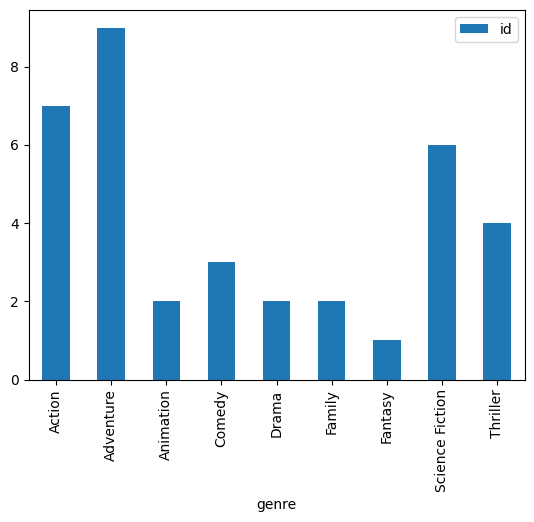

In [37]:
#iimport matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', 
                                      left_on = 'movie_id', 
                                      right_on = 'id')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

### Using outer join to select actors
One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: Iron Man 1 and Iron Man 2. Most of the actors played in both movies. Use an outer join to find actors who did not act in both movies.

The Iron Man 1 table is called iron_1_actors, and Iron Man 2 table is called iron_2_actors. Both tables have been loaded for you and a few rows printed so you can see the structure.



In [38]:
Image(url='https://assets.datacamp.com/production/repositories/5486/datasets/c5d02ebba511e90ae132f89ff091e6729c040bd2/noJoin.png')

In [39]:
#import casts
cast = pd.read_pickle('casts.p')
print(cast.head())

    movie_id  cast_id character  gender    id               name
7          5       22   Jezebel       1  3122        Sammi Davis
8          5       23     Diana       1  3123  Amanda de Cadenet
9          5       24    Athena       1  3124     Valeria Golino
3          5       25   Elspeth       1  3125            Madonna
12         5       26       Eva       1  3126          Ione Skye


In [40]:
#find corresponding id for movies that belong to Iron Man a dn Iron Man 2
movies[movies['title'].str.contains("Iron")]
# iron man = id 1726
# iron man 2 = id 10138

,id,title,popularity,release_date
181,10386,The Iron Giant,61.245957,1999-08-06
2198,1726,Iron Man,120.725053,2008-04-30
3041,38543,Ironclad,12.317080,2011-03-03
3271,97430,The Man with the Iron Fists,17.672021,2012-11-02
3286,68721,Iron Man 3,77.682080,2013-04-18
3401,10138,Iron Man 2,77.300194,2010-04-28
3900,9313,The Man in the Iron Mask,28.980270,1998-03-12
4539,71688,The Iron Lady,23.378400,2011-12-30


In [41]:
# create a dataframe for iron_1_actors and iron_2_actors
iron_1_actors_v1 = movies.merge(cast, left_on = 'id', \
                            right_on = 'movie_id',
                            how = 'left', \
                               suffixes = ['_mov', '_cast'])
print(iron_1_actors_v1)

        id_mov                title  popularity release_date  movie_id  \
0          257         Oliver Twist   20.415572   2005-09-23     257.0   
1          257         Oliver Twist   20.415572   2005-09-23     257.0   
2          257         Oliver Twist   20.415572   2005-09-23     257.0   
3          257         Oliver Twist   20.415572   2005-09-23     257.0   
4          257         Oliver Twist   20.415572   2005-09-23     257.0   
...        ...                  ...         ...          ...       ...   
106295   11622  Blast from the Past    8.737058   1999-02-12   11622.0   
106296   11622  Blast from the Past    8.737058   1999-02-12   11622.0   
106297   11622  Blast from the Past    8.737058   1999-02-12   11622.0   
106298   11622  Blast from the Past    8.737058   1999-02-12   11622.0   
106299   11622  Blast from the Past    8.737058   1999-02-12   11622.0   

        cast_id          character  gender    id_cast              name  
0           1.0       Oliver Twist   

In [42]:
#ensure you get Iron Man 1 cast
iron_1_actors_v2 = iron_1_actors_v1[iron_1_actors_v1['id_mov']==1726]
print(iron_1_actors_v2)

       id_mov     title  popularity release_date  movie_id  cast_id  \
48817    1726  Iron Man  120.725053   2008-04-30    1726.0      9.0   
48818    1726  Iron Man  120.725053   2008-04-30    1726.0     10.0   
48819    1726  Iron Man  120.725053   2008-04-30    1726.0     11.0   
48820    1726  Iron Man  120.725053   2008-04-30    1726.0     12.0   
48821    1726  Iron Man  120.725053   2008-04-30    1726.0     17.0   
...       ...       ...         ...          ...       ...      ...   
48899    1726  Iron Man  120.725053   2008-04-30    1726.0    103.0   
48900    1726  Iron Man  120.725053   2008-04-30    1726.0    104.0   
48901    1726  Iron Man  120.725053   2008-04-30    1726.0    106.0   
48902    1726  Iron Man  120.725053   2008-04-30    1726.0    107.0   
48903    1726  Iron Man  120.725053   2008-04-30    1726.0    109.0   

                                          character  gender    id_cast  \
48817                                        Yinsen     2.0    17857.0   

In [43]:
# drop un-needed columns
iron_1_actors = iron_1_actors_v2.drop(columns=['id_mov', 'title', 'popularity', 'release_date', 'movie_id', \
                                              'gender', 'cast_id'])
#rename id_cast to id
iron_1_actors = iron_1_actors.rename(columns = {'id_cast' : 'id'})

#convert id from float to int values
iron_1_actors['id'] = iron_1_actors['id'].astype(int)

#print
print(iron_1_actors)

                                          character       id  \
48817                                        Yinsen    17857   
48818                       Virginia "Pepper" Potts    12052   
48819                   Obadiah Stane / Iron Monger     1229   
48820  Lt. Col. James "Rhodey" Rhodes / War Machine    18288   
48821                            Christine Everhart    57451   
...                                             ...      ...   
48899                         Reporter (uncredited)  1209728   
48900                   News Cameraman (uncredited)  1209729   
48901                  Rooftop Fireman (uncredited)  1209730   
48902             Whiplash One (voice) (uncredited)  1209731   
48903                         Reporter (uncredited)  1429470   

                    name  
48817         Shaun Toub  
48818    Gwyneth Paltrow  
48819       Jeff Bridges  
48820    Terrence Howard  
48821        Leslie Bibb  
...                  ...  
48899         Chris Reid  
48900          

In [44]:
# do the same for iron_man_2 
# create a dataframe for iron_1_actors and iron_2_actors
iron_2_actors_v1 = movies.merge(cast, left_on = 'id', \
                            right_on = 'movie_id',
                            how = 'left', \
                               suffixes = ['_mov', '_cast'])
print(iron_2_actors_v1)

        id_mov                title  popularity release_date  movie_id  \
0          257         Oliver Twist   20.415572   2005-09-23     257.0   
1          257         Oliver Twist   20.415572   2005-09-23     257.0   
2          257         Oliver Twist   20.415572   2005-09-23     257.0   
3          257         Oliver Twist   20.415572   2005-09-23     257.0   
4          257         Oliver Twist   20.415572   2005-09-23     257.0   
...        ...                  ...         ...          ...       ...   
106295   11622  Blast from the Past    8.737058   1999-02-12   11622.0   
106296   11622  Blast from the Past    8.737058   1999-02-12   11622.0   
106297   11622  Blast from the Past    8.737058   1999-02-12   11622.0   
106298   11622  Blast from the Past    8.737058   1999-02-12   11622.0   
106299   11622  Blast from the Past    8.737058   1999-02-12   11622.0   

        cast_id          character  gender    id_cast              name  
0           1.0       Oliver Twist   

In [45]:
#ensure you get Iron Man 1 cast
iron_2_actors_v2 = iron_2_actors_v1[iron_2_actors_v1['id_mov']==10138]
print(iron_2_actors_v2)

       id_mov       title  popularity release_date  movie_id  cast_id  \
75182   10138  Iron Man 2   77.300194   2010-04-28   10138.0      3.0   
75183   10138  Iron Man 2   77.300194   2010-04-28   10138.0      5.0   
75184   10138  Iron Man 2   77.300194   2010-04-28   10138.0      6.0   
75185   10138  Iron Man 2   77.300194   2010-04-28   10138.0      7.0   
75186   10138  Iron Man 2   77.300194   2010-04-28   10138.0     18.0   
...       ...         ...         ...          ...       ...      ...   
75292   10138  Iron Man 2   77.300194   2010-04-28   10138.0    134.0   
75293   10138  Iron Man 2   77.300194   2010-04-28   10138.0    135.0   
75294   10138  Iron Man 2   77.300194   2010-04-28   10138.0    136.0   
75295   10138  Iron Man 2   77.300194   2010-04-28   10138.0    137.0   
75296   10138  Iron Man 2   77.300194   2010-04-28   10138.0    147.0   

                                              character  gender    id_cast  \
75182                             Ivan Vanko 

In [46]:
# drop un-needed columns
iron_2_actors = iron_2_actors_v2.drop(columns=['id_mov', 'title', 'popularity', 'release_date', 'movie_id', \
                                              'gender', 'cast_id'])
#rename id_cast to id
iron_2_actors = iron_2_actors.rename(columns = {'id_cast' : 'id'})

#convert id from float to int values
iron_2_actors['id'] = iron_2_actors['id'].astype(int)

#print
print(iron_2_actors)

                                              character       id  \
75182                             Ivan Vanko / Whiplash     2295   
75183  Natalie Rushman / Natasha Romanoff / Black Widow     1245   
75184                                     Justin Hammer     6807   
75185                                Director Nick Fury     2231   
75186                           Virginia "Pepper" Potts    12052   
...                                                 ...      ...   
75292                           US Senator (uncredited)  1265840   
75293                           Background (uncredited)  1265841   
75294                     Tony Stark Usher (uncredited)  1122811   
75295                        Expo Attendee (uncredited)  1205141   
75296                  Stark Expo Attendee (uncredited)  1429470   

                         name  
75182           Mickey Rourke  
75183      Scarlett Johansson  
75184            Sam Rockwell  
75185       Samuel L. Jackson  
75186         Gwyneth P

In [47]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes ('_1','_2')
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     on = 'id',
                                     how = 'outer',
                                     suffixes= ('_1','_2'))

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | 
     (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

                   character_1    id        name_1  \
0  Obadiah Stane / Iron Monger  1229  Jeff Bridges   
1                          NaN  1245           NaN   
2                          NaN  1896           NaN   
4                          NaN  2295           NaN   
7                          NaN  6807           NaN   

                                        character_2              name_2  
0                                               NaN                 NaN  
1  Natalie Rushman / Natasha Romanoff / Black Widow  Scarlett Johansson  
2      Lt. Col. James "Rhodey" Rhodes / War Machine         Don Cheadle  
4                             Ivan Vanko / Whiplash       Mickey Rourke  
7                                     Justin Hammer        Sam Rockwell  


### Self join
Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called crews, which has columns id, job, and name. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.



In [48]:
#import crews pickle file
crews = pd.read_pickle('crews.p')
print(crews.head())

      id  department             job               name
0  19995     Editing          Editor  Stephen E. Rivkin
2  19995       Sound  Sound Designer  Christopher Boyes
4  19995  Production         Casting          Mali Finn
6  19995   Directing        Director      James Cameron
7  19995     Writing          Writer      James Cameron


In [49]:
# To a variable called crews_self_merged, merge the crews table to itself on the id column using an inner join, setting the suffixes to '_dir' and '_crew' 
#for the left and right tables respectively.
crews_self_merged = crews.merge(crews, on = 'id', how = 'inner', \
                               suffixes = ['_dir', '_crew'])

print(crews_self_merged.head())

      id department_dir job_dir           name_dir department_crew  \
0  19995        Editing  Editor  Stephen E. Rivkin         Editing   
1  19995        Editing  Editor  Stephen E. Rivkin           Sound   
2  19995        Editing  Editor  Stephen E. Rivkin      Production   
3  19995        Editing  Editor  Stephen E. Rivkin       Directing   
4  19995        Editing  Editor  Stephen E. Rivkin         Writing   

         job_crew          name_crew  
0          Editor  Stephen E. Rivkin  
1  Sound Designer  Christopher Boyes  
2         Casting          Mali Finn  
3        Director      James Cameron  
4          Writer      James Cameron  


In [50]:
# Create a Boolean index, named boolean_filter, that selects rows from the left table with the job of 'Director' and avoids rows with the job of 'Director' in the right table.
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
     (crews_self_merged['job_crew'] != 'Director'))

direct_crews = crews_self_merged[boolean_filter]

#print
print(direct_crews.head())

        id department_dir   job_dir       name_dir department_crew  \
156  19995      Directing  Director  James Cameron         Editing   
157  19995      Directing  Director  James Cameron           Sound   
158  19995      Directing  Director  James Cameron      Production   
160  19995      Directing  Director  James Cameron         Writing   
161  19995      Directing  Director  James Cameron             Art   

           job_crew          name_crew  
156          Editor  Stephen E. Rivkin  
157  Sound Designer  Christopher Boyes  
158         Casting          Mali Finn  
160          Writer      James Cameron  
161    Set Designer    Richard F. Mays  


### How does pandas handle self joins?

- You can merge a table to itself with a right join.
- Merging a table to itself can allow you to compare values in a column to other values in the same column.
- Merging a table to itself is like working with two separate tables.

### Index merge for movie ratings
To practice merging on indexes, you will merge movies and a table called ratings that holds info about movie ratings. Make sure your merge returns all of the rows from the movies table and not all the rows of ratings table need to be included in the result.


In [51]:
#import ratings pickle
ratings = pd.read_pickle('ratings.p')

print(ratings.head())

       id  vote_average  vote_count
0   19995           7.2     11800.0
1     285           6.9      4500.0
2  206647           6.3      4466.0
3   49026           7.6      9106.0
4   49529           6.1      2124.0


In [52]:
print(movies.head())

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17


In [53]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on = 'id', how = 'left')

# Print the first few rows of movies_ratings
print(movies_ratings.head())

      id                 title  popularity release_date  vote_average  \
0    257          Oliver Twist   20.415572   2005-09-23           6.7   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5   
2  38365             Grown Ups   38.864027   2010-06-24           6.0   
3   9672              Infamous    3.680896   2006-11-16           6.4   
4  12819       Alpha and Omega   12.300789   2010-09-17           5.3   

   vote_count  
0       274.0  
1        27.0  
2      1705.0  
3        60.0  
4       124.0  


### Do sequels earn more?
It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the sequels and financials tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the sequels table and not all the rows of financials table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

In [54]:
# import sequels.pd
sequels = pd.read_pickle('sequels.p')
print(sequels.head())

      id         title  sequel
0  19995        Avatar    <NA>
1    862     Toy Story     863
2    863   Toy Story 2   10193
3    597       Titanic    <NA>
4  24428  The Avengers    <NA>


In [55]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
# suffixes as _ord and_seq - note right_idex = True will not accept! hence we have incorrect index in print
# <string>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
orig_seq = sequels_fin.merge(sequels_fin, left_on='sequel', 
                             right_on='id', how='inner', right_index = False,
                             suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]

# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values('diff', ascending = False).head())

            title_org        title_seq          diff
28  Jurassic Park III   Jurassic World  1.144748e+09
26      Batman Begins  The Dark Knight  6.303398e+08
11         Iron Man 2       Iron Man 3  5.915067e+08
1         Toy Story 2      Toy Story 3  5.696028e+08
14  Quantum of Solace          Skyfall  5.224703e+08


## 3. Advanced Merging and Concatinating

### Steps of a semi join

- merge left and right tables on key column using inner join
- search if the key column in left table is in merged tables using .isin() method creating boolean series
- subset rows of left table

### Performing an anti join
In our music streaming company dataset, each customer is assigned an employee representative to assist them. In this exercise, filter the employee table by a table of top customers, returning only those employees who are not assigned to a customer. The results should resemble the results of an anti join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

In [56]:
#import top customers xlsx file
top_cust = pd.read_excel('top_cust.xlsx')
print(top_cust.head())

   cid  srid      fname        lname           phone            fax  \
0    1     3       Luís    Gonçalves  +123923-555555    +1239235566   
1    2     5     Leonie       Köhler   +497112842222            NaN   
2    3     3   François     Tremblay  +1-514721-4711            NaN   
3    4     4      Bjørn       Hansen     +2244222222            NaN   
4    5     4  František  Wichterlová      +241725555  +420241725555   

                      email  
0      luisg@embraer.com.br  
1     leonekohler@surfeu.de  
2       ftremblay@gmail.com  
3     bjorn.hansen@yahoo.no  
4  frantisekw@jetbrains.com  


In [57]:
#import employees xlsx file
employees = pd.read_excel('employees.xlsx')
print(employees)

   srid     lname     fname                title  hire_date  \
0     1     Adams    Andrew     General Manager  2002-08-14   
1     2   Edwards     Nancy       Sales Manager  2002-05-01   
2     3   Peacock      Jane  Sales Support Agent 2002-04-01   
3     4      Park  Margaret  Sales Support Agent 2003-05-03   
4     5   Johnson     Steve  Sales Support Agent 2003-10-17   
5     6  Mitchell   Michael          IT Manager  2003-10-17   
6     7      King    Robert            IT Staff  2004-01-02   
7     8  Callahan     Laura            IT Staff  2004-03-04   

                      email  
0    andrew@chinookcorp.com  
1     nancy@chinookcorp.com  
2      jane@chinookcorp.com  
3  margaret@chinookcorp.com  
4     steve@chinookcorp.com  
5   michael@chinookcorp.com  
6    robert@chinookcorp.com  
7     laura@chinookcorp.com  


In [58]:
# Merge employees and top_cust with a left join, setting indicator argument to True. Save the result to empl_cust.
empl_cust = employees.merge(top_cust, on='srid', 
                            how='left', indicator=True)

# Select the srid column of empl_cust and the rows where _merge is 'left_only'. Save the result to srid_list.
srid_list = empl_cust.loc[empl_cust['_merge']=='left_only', 'srid']

#Subset the employees table and select those rows where the srid is in the variable srid_list and print the results.
print(employees[employees['srid'].isin(srid_list)])


   srid     lname    fname             title  hire_date  \
0     1     Adams   Andrew  General Manager  2002-08-14   
1     2   Edwards    Nancy    Sales Manager  2002-05-01   
5     6  Mitchell  Michael       IT Manager  2003-10-17   
6     7      King   Robert         IT Staff  2004-01-02   
7     8  Callahan    Laura         IT Staff  2004-03-04   

                     email  
0   andrew@chinookcorp.com  
1    nancy@chinookcorp.com  
5  michael@chinookcorp.com  
6   robert@chinookcorp.com  
7    laura@chinookcorp.com  


### Performing a semi join
Some of the tracks that have generated the most significant amount of revenue are from TV-shows or are other non-musical audio. You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi join to find the top revenue-generating non-musical tracks..



In [59]:
# import the excel files as df using pandas
genres = pd.read_excel("genres.xlsx")
top_invoices = pd.read_excel("top_invoices.xlsx")
non_mus_tcks = pd.read_excel("non_mus_tcks.xlsx")

In [60]:
# Merge the non_mus_tck and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices, on='tid', how='inner')

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]
 
# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':'count'})
 
# Merge the genres table to cnt_by_gid on gid and print
print(cnt_by_gid.merge(genres, on = 'gid'))

   gid  tid  Unnamed: 0        name
0   19    4          18  TV Shows  
1   21    2          20    Drama   
2   22    1          21   Comedy   


### Concatenation basics
You have been given a few tables of data with musical track info for different albums from the metal band, Metallica. The track info comes from their Ride The Lightning, Master Of Puppets, and St. Anger albums. Try various features of the .concat() method by concatenating the tables vertically together in different ways.



In [61]:
#import datasets
tracks_master = pd.read_excel('tracks_master.xlsx')
tracks_ride = pd.read_excel('tracks_ride.xlsx')
tracks_st = pd.read_excel('tracks_st.xlsx')

In [62]:
# Concatenate tracks_master, tracks_ride, and tracks_st, in that order, setting sort to True.
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               sort=True)
print(tracks_from_albums)

   Unnamed: 0  aid             composer  gid  mtid                     name  \
0           0  152  J.Hetfield/L.Ulrich    3     1                  Battery   
1           1  152            K.Hammett    3     1        Master Of Puppets   
2           4  152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes   
0           0  154                  NaN    3     1     Fight Fire With Fire   
1           1  154                  NaN    3     1       Ride The Lightning   
2           2  154                  NaN    3     1  For Whom the Bell Tolls   
3           3  154                  NaN    3     1            Fade To Black   
4           4  154                  NaN    3     1        Trapped Under Ice   
0           0  155                  NaN    3     1                  Frantic   
1           1  155                  NaN    3     1                St. Anger   
2           2  155                  NaN    3     1     Some Kind Of Monster   
3           3  155                  NaN    3     1  

In [63]:
# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               ignore_index=True,
                               sort=True)
print(tracks_from_albums)

    Unnamed: 0  aid             composer  gid  mtid                     name  \
0            0  152  J.Hetfield/L.Ulrich    3     1                  Battery   
1            1  152            K.Hammett    3     1        Master Of Puppets   
2            4  152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes   
3            0  154                  NaN    3     1     Fight Fire With Fire   
4            1  154                  NaN    3     1       Ride The Lightning   
5            2  154                  NaN    3     1  For Whom the Bell Tolls   
6            3  154                  NaN    3     1            Fade To Black   
7            4  154                  NaN    3     1        Trapped Under Ice   
8            0  155                  NaN    3     1                  Frantic   
9            1  155                  NaN    3     1                St. Anger   
10           2  155                  NaN    3     1     Some Kind Of Monster   
11           3  155                  NaN

In [64]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               join = 'inner',
                               sort=True)
print(tracks_from_albums)

   Unnamed: 0  aid  gid  mtid                     name   tid  u_price
0           0  152    3     1                  Battery  1853     0.99
1           1  152    3     1        Master Of Puppets  1854     0.99
2           4  152    3     1        Disposable Heroes  1857     0.99
0           0  154    3     1     Fight Fire With Fire  1874     0.99
1           1  154    3     1       Ride The Lightning  1875     0.99
2           2  154    3     1  For Whom the Bell Tolls  1876     0.99
3           3  154    3     1            Fade To Black  1877     0.99
4           4  154    3     1        Trapped Under Ice  1878     0.99
0           0  155    3     1                  Frantic  1882     0.99
1           1  155    3     1                St. Anger  1883     0.99
2           2  155    3     1     Some Kind Of Monster  1884     0.99
3           3  155    3     1             Dirty Window  1885     0.99
4           4  155    3     1            Invisible Kid  1886     0.99


### Concatenating with keys
The leadership of the music streaming company has come to you and asked you for assistance in analyzing sales for a recent business quarter. They would like to know which month in the quarter saw the highest average invoice total. You have been given three tables with invoice data named inv_jul, inv_aug, and inv_sep. Concatenate these tables into one to create a graph of the average monthly invoice total.



In [65]:
#import datasets
inv_jul = pd.read_excel('inv_jul.xlsx')
inv_aug = pd.read_excel('inv_aug.xlsx')
inv_sep = pd.read_excel('inv_sep.xlsx')

#check columns of df
for cols in inv_jul:
    print(cols)

Unnamed: 0
iid
cid
invoice_date
total
bill_ctry


In [66]:
print(inv_jul.head())

   Unnamed: 0  iid  cid invoice_date  total       bill_ctry
0           0   42   51   2009-07-06   1.98          Sweden
1           1   43   53   2009-07-06   1.98              UK
2           2   44   55   2009-07-07   3.96       Australia
3           3   45   59   2009-07-08   5.94           India
4           4   46    6   2009-07-11   8.91  Czech Republic


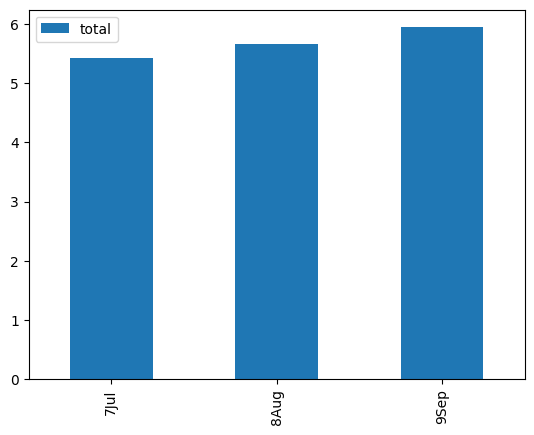

In [67]:
# Concatenate the three tables together vertically in order with the oldest month first, adding '7Jul', '8Aug', and '9Sep' as keys for their respective months, and save to variable avg_inv_by_month.
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], 
                            keys=['7Jul','8Aug','9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total': 'mean'})

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind='bar')
plt.show()

### Validating a merge
You have been given 2 tables, artists, and albums. Use the IPython shell to merge them using artists.merge(albums, on='artid').head(). 

What is True:

- You can use one-to-many without error since there is a duplicate key in the right table
- You can use many-to-many wihtout error since there is a duplicate key in one of the tables

### Concatenate and merge to find common songs
The senior leadership of the streaming service is requesting your help again. You are given the historical files for a popular playlist in the classical music genre in 2018 and 2019. Additionally, you are given a similar set of files for the most popular pop music genre playlist on the streaming service in 2018 and 2019. Your goal is to concatenate the respective files to make a large classical playlist table and overall popular music table. Then filter the classical music table using a semi join to return only the most popular classical music tracks.


In [68]:
#import datasets
pop_18 = pd.read_excel('pop_18.xlsx')
pop_19 = pd.read_excel('pop_19.xlsx')
classic_18 = pd.read_excel('classic_18.xlsx')
classic_19 = pd.read_excel('classic_19.xlsx')

In [69]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19],
                         ignore_index=True,
                               sort=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19],
                         ignore_index=True,
                               sort=True)

# With classic_18_19 on the left, merge it with pop_18_19 on tid using an inner join.
classic_pop = classic_18_19.merge(pop_18_19, on = 'tid', how='inner')

# Using .isin(), filter classic_18_19 rows where tid is in classic_pop
popular_classic = classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]

# Print popular chart
print(popular_classic)

    Unnamed: 0  pid   tid
7         8535   12  3491
22        8539   12  3495
23        8567   12  3449
27        8566   12  3448
44        8561   12  3443
47        8538   12  3494
49        8590   12  3420


## 4. Merging Ordered and Time-Series Data


### Correlation between GDP and S&P500
In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

In [70]:
#import datasets gdp and sp500
sp500 = pd.read_excel('sp500.xlsx')
gdp = pd.read_excel('gdp.xlsx')

In [71]:
print(sp500.head())

  country code  year             gdp    date  returns  date.1  returns.1
0          USA  2010  14990000000000  2010.0    12.78    2008     -38.49
1          USA  2011  15540000000000  2011.0     0.00    2009      23.45
2          USA  2012  16200000000000  2012.0    13.41    2010      12.78
3          USA  2012  16200000000000  2012.0    13.41    2011       0.00
4          USA  2013  16780000000000  2013.0    29.60    2012      13.41


In [72]:
# Use merge_ordered() to merge gdp and sp500 using a left join on year and date. Save the results as gdp_sp500.
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left')

# Print gdp_sp500
print(gdp_sp500)

    Unnamed: 0 country code_x  year_x           gdp_x country code_y  year_y  \
0            3            USA    2010  14990000000000            USA  2010.0   
1            7            USA    2011  15540000000000            USA  2011.0   
2           11            USA    2012  16200000000000            USA  2012.0   
3           11            USA    2012  16200000000000            USA  2012.0   
4           15            USA    2012  16200000000000            USA  2012.0   
5           15            USA    2012  16200000000000            USA  2012.0   
6           19            USA    2013  16780000000000            USA  2013.0   
7           23            USA    2014  17520000000000            USA  2014.0   
8           27            USA    2015  18220000000000            USA  2015.0   
9           31            USA    2016  18710000000000            USA  2016.0   
10          35            USA    2017  19490000000000            USA  2017.0   
11          39            USA    2018  2

In [73]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left', fill_method = 'ffill')

# Print gdp_sp500
print (gdp_sp500)

    Unnamed: 0 country code_x  year_x           gdp_x country code_y  year_y  \
0            3            USA    2010  14990000000000            USA    2010   
1            7            USA    2011  15540000000000            USA    2011   
2           11            USA    2012  16200000000000            USA    2012   
3           11            USA    2012  16200000000000            USA    2012   
4           15            USA    2012  16200000000000            USA    2012   
5           15            USA    2012  16200000000000            USA    2012   
6           19            USA    2013  16780000000000            USA    2013   
7           23            USA    2014  17520000000000            USA    2014   
8           27            USA    2015  18220000000000            USA    2015   
9           31            USA    2016  18710000000000            USA    2016   
10          35            USA    2017  19490000000000            USA    2017   
11          39            USA    2018  2

In [74]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(gdp, sp500, left_on='year', right_on='date', 
                             how='left',  fill_method='ffill')

# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['gdp_x', 'returns']]

# Print gdp_returns correlation i.e. correlation matrix
print (gdp_returns.corr())

            gdp_x   returns
gdp_x    1.000000  0.195339
returns  0.195339  1.000000


### Phillips curve using merge_ordered()
There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

In [75]:
# import datasets unemployment and inflation
unemployment = pd.read_excel('unemployment.xlsx')
inflation = pd.read_excel('inflation.xlsx')

In [76]:
for col in unemployment:
    print(col)

for col in inflation:
    print(col)

date
unemployment_rate
date
cpi
seriesid
data_type


        date      cpi     seriesid                  data_type  \
0 2014-01-01  235.288  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
1 2014-06-01  237.231  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
2 2015-01-01  234.718  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
3 2015-06-01  237.684  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
4 2016-01-01  237.833  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
5 2016-06-01  240.167  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
6 2017-01-01  243.780  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
7 2017-06-01  244.182  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
8 2018-01-01  248.884  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   
9 2018-06-01  251.134  CUSR0000SA0  SEASONALLY ADJUSTED INDEX   

   unemployment_rate  
0                6.7  
1                6.1  
2                5.6  
3                5.3  
4                5.0  
5                4.9  
6                4.7  
7                4.3  
8                4.1  
9                4.0  


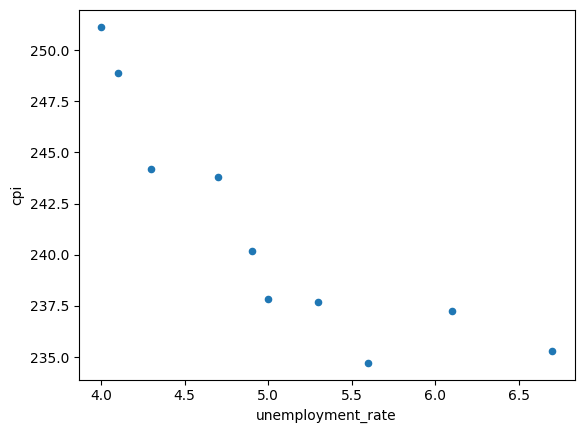

In [77]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, on = 'date', how = 'inner')

# Print inflation_unemploy 
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
# note: CPI = consumer price index which measures inflation
inflation_unemploy.plot(kind = 'scatter', x='unemployment_rate', y='cpi')
plt.show()

### merge_ordered() caution, multiple columns
When using merge_ordered() to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for the Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.

In [78]:
#import datasets
pop = pd.read_excel('pop.xlsx')
gdp2 = pd.read_excel('gdp2.xlsx')

In [79]:
for col in pop:
    print(col)
for col in gdp2:
    print(col)

date
country
pop
series_code
date
country
gdp
series_code


In [80]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp2, pop, on = ['date', 'country'],
                             fill_method='ffill')

# Print ctry_date
print(ctry_date)

         date    country         gdp  series_code_x       pop series_code_y
0  1990-01-01  Australia  158051.132  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
1  1990-01-01     Sweden   79837.846  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
2  1990-04-01  Australia  158263.582  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
3  1990-04-01     Sweden   80582.286  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
4  1990-07-01  Australia  157329.279  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
5  1990-07-01     Sweden   79974.360  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
6  1990-09-01  Australia  158240.678  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
7  1990-09-01     Sweden   80106.497  NYGDPMKTPSAKD   8558835   SP.POP.TOTL
8  1991-01-01  Australia  156195.954  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
9  1991-01-01     Sweden   79524.242  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
10 1991-04-01  Australia  155989.033  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
11 1991-04-01     Sweden   79073.059  NYGDPMKTPSAKD   8617375   SP.POP.TOTL
12 1991-07-0

In [81]:
# Perform the same merge of gdp and pop, but join on country and date (reverse of step 1) with the fill feature, saving this as date_ctry.
date_ctry = pd.merge_ordered(gdp2, pop, on = ['country', 'date'],
                            fill_method = 'ffill')

# Print date_ctry
print(date_ctry)

         date    country         gdp  series_code_x       pop series_code_y
0  1990-01-01  Australia  158051.132  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
1  1990-04-01  Australia  158263.582  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
2  1990-07-01  Australia  157329.279  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
3  1990-09-01  Australia  158240.678  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
4  1991-01-01  Australia  156195.954  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
5  1991-04-01  Australia  155989.033  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
6  1991-07-01  Australia  156635.858  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
7  1991-09-01  Australia  156744.057  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
8  1992-01-01  Australia  157916.081  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
9  1992-04-01  Australia  159047.827  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
10 1992-07-01  Australia  160658.176  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
11 1992-09-01  Australia  163960.221  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
12 1993-01-0

### Using merge_asof() to study stocks
You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the pandas .diff() method to compute the price change over time. Finally, plot the price changes so you can review your analysis.


In [82]:
# import datasets
wells = pd.read_excel('wells.xlsx') 
bac = pd.read_excel('bac.xlsx') 
jpm = pd.read_excel('jpm.xlsx') 
print(jpm.head())
# Python expression is '%d-%m-%Y'. The date formats of '%d/%m/%Y' or '%d.%m.%Y' would fail because the characters between the date placeholders are wrong.
wells.dtypes

             date_time   close
0  11/17/2017 15:35:17  98.120
1  11/17/2017 15:40:04  98.180
2  11/17/2017 15:45:01  97.731
3  11/17/2017 15:50:55  97.740
4  11/17/2017 15:55:00  97.815


date_time     object
close        float64
dtype: object

In [83]:
#first convert columns to datetime datatype, then define format
wells['date_time'] = pd.to_datetime(wells['date_time'])
wells['date_time'] = pd.to_datetime(wells['date_time'], format="%m/%d/%Y, %H:%M:%S")
bac['date_time'] = pd.to_datetime(bac['date_time'])
bac['date_time'] = pd.to_datetime(bac['date_time'], format="%m/%d/%Y, %H:%M:%S")
jpm['date_time'] = pd.to_datetime(jpm['date_time'])
jpm['date_time'] = pd.to_datetime(jpm['date_time'], format="%m/%d/%Y, %H:%M:%S")

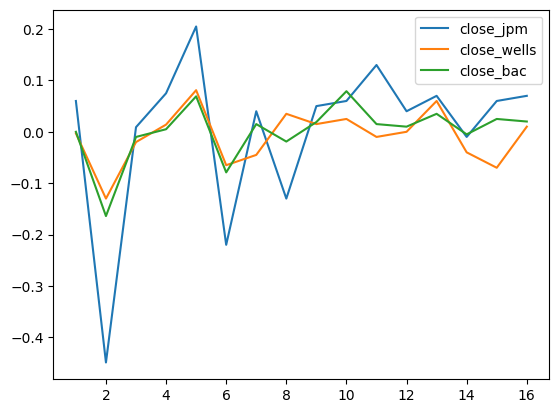

In [84]:
# Use merge_asof() to merge jpm (left table) and wells together on the date_time column, 
#  where the rows with the nearest times are matched, and with suffixes=('', '_wells'). Save to jpm_wells.
jpm_wells = pd.merge_asof(jpm, wells, on = 'date_time', suffixes=('', '_wells'), direction = 'nearest')

# Use merge_asof() to merge jpm_wells (left table) and bac together on the date_time column, 
# where the rows with the closest times are matched, and with suffixes=('_jpm', '_bac'). Save to jpm_wells_bac.
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on = 'date_time', suffixes=('_jpm', '_bac'),direction = 'nearest')

# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm', 'close_wells', 'close_bac'])
plt.show()

### Using merge_asof() to create dataset
The merge_asof() function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given gdp, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table recession has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use merge_asof() to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.

In [85]:
#import datasets
gdp3 = pd.read_excel('gdp3.xlsx')
recession = pd.read_excel('recession.xlsx')

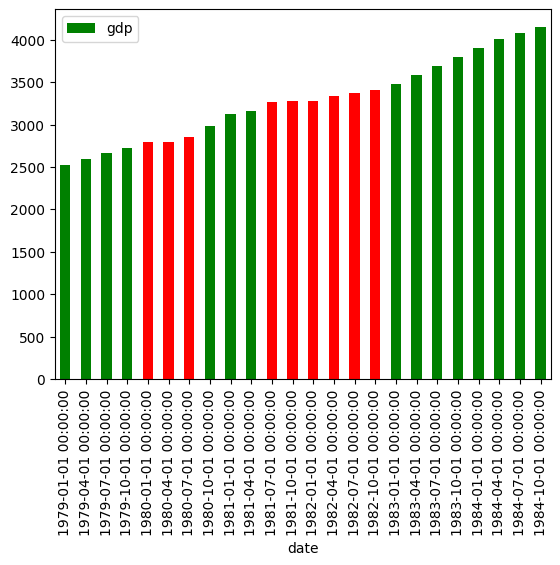

In [86]:
# Using merge_asof(), merge gdp3 and recession on date, with gdp as the left table. Save to the variable gdp_recession.
gdp_recession =  pd.merge_asof(gdp3, recession)

# Create a list using a list comprehension and a conditional expression, named is_recession, where for each row if the gdp_recession['econ_status'] value is equal to 'recession' then enter 'r' else 'g'.
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date', color=is_recession, rot=90)
plt.show()

### merge_asof() and merge_ordered() differences

merge_asof()

- has an arguement that can be set 'forward' to select 1st row in right table whose key column is greater or equal to the left
- after matching 2 tables, if there are missing values at top of the table form the right table, this function can fill them in 
- it can be used to do fuzzy matching of dates between tables

merge_ordered()

- allows for right join during the merge
- if it cannot match the rows exactly, it can use forward fill to interpolate the missing data

both()

- function can set the suffix for overlapping column names
- can be used when working with ordered or time series data

### Explore financials with .query()
You have been given a table of financial data from some popular social network companies called social_fin. All of the values are in thousands of US dollars.

Use the .query() method and the IPython shell to explore social_fin and select the True statement.

In [87]:
#import dataset
social_fin = pd.read_excel('social_fin.xlsx')
print(social_fin.head())

            financial  company  year    value
0       total_revenue  twitter  2019  3459329
1     cost_of_revenue  twitter  2019  1137041
2        gross_profit  twitter  2019  2322288
3  operating_expenses  twitter  2019  1955915
4          net_income  twitter  2019  1465659


In [88]:
# - there are 2 rows where value > $50,000,000 - false
social_fin.query('value > 50000000')

,financial,company,year,value
5,total_revenue,facebook,2019,70697000
7,gross_profit,facebook,2019,57927000
20,total_revenue,facebook,2018,55838000


In [89]:
# there are 3 rows for total revenue of facebook - false
social_fin.query('financial == "total_revenue" and company == "facebook"')

,financial,company,year,value
5,total_revenue,facebook,2019,70697000
20,total_revenue,facebook,2018,55838000
35,total_revenue,facebook,2017,40653000
50,total_revenue,facebook,2016,27638000


In [90]:
#there are 6 rows where net income has negative value - true
social_fin.query('financial == "net_income" and value < 0')

,financial,company,year,value
14,net_income,snap,2019,-1033660
29,net_income,snap,2018,-1255911
34,net_income,twitter,2017,-108063
44,net_income,snap,2017,-3445066
49,net_income,twitter,2016,-456873
59,net_income,snap,2016,-514643


In [91]:
#there are 45 rows, where gross profit is greater than $100k - false
social_fin.query('financial == "gross_profit" and value > 100000')

,financial,company,year,value
2,gross_profit,twitter,2019,2322288
7,gross_profit,facebook,2019,57927000
12,gross_profit,snap,2019,819696
17,gross_profit,twitter,2018,2077362
22,gross_profit,facebook,2018,46483000
27,gross_profit,snap,2018,381581
32,gross_profit,twitter,2017,1582057
37,gross_profit,facebook,2017,35199000
42,gross_profit,snap,2017,107487
47,gross_profit,twitter,2016,1597379


### Subsetting rows with .query()
In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the .query() method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the .query() method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.

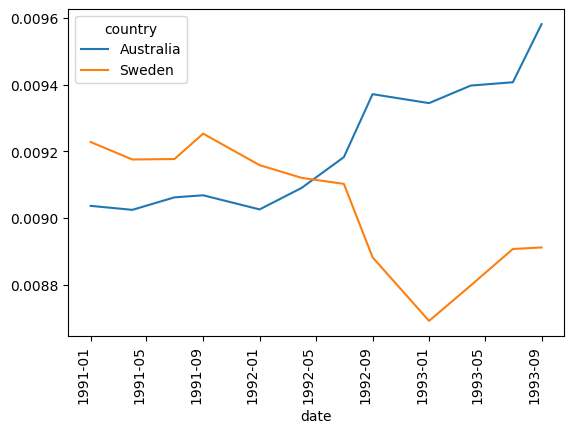

In [92]:
# Use merge_ordered() on gdp and pop on columns country and date with the fill feature, save to gdp_pop and print.
gdp_pop = pd.merge_ordered(gdp2, pop, on = ['country', 'date'], fill_method='ffill')

#Add a column named gdp_per_capita to gdp_pop that divides gdp by pop.
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop'] 

# Pivot gdp_pop so values='gdp_per_capita', index='date', and columns='country', save as gdp_pivot.
gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', index='date', columns= 'country')

# Use .query() to select rows from gdp_pivot where date is greater than equal to "1991-01-01". Save as recent_gdp_pop.
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

### Select the right .melt() arguments
You are given a table named inflation. Chose the option to get the same output as the table below.

data:
    
        country    indicator  year  annual
        0   Brazil  Inflation %  2017    3.45
        1   Canada  Inflation %  2017    1.60
        2   France  Inflation %  2017    1.03
        3    India  Inflation %  2017    2.49
        4   Brazil  Inflation %  2018    3.66
        5   Canada  Inflation %  2018    2.27
        6   France  Inflation %  2018    1.85
        7    India  Inflation %  2018    4.86
        8   Brazil  Inflation %  2019    3.73
        9   Canada  Inflation %  2019    1.95
        10  France  Inflation %  2019    1.11
        11   India  Inflation %  2019    7.66

In [93]:
#import dataset
inflation2 = pd.read_excel('inflation2.xlsx')
print(inflation2)

  country    indicator  2017  2018  2019
0  Brazil  Inflation %  3.45  3.66  3.73
1  Canada  Inflation %  1.60  2.27  1.95
2  France  Inflation %  1.03  1.85  1.11
3   India  Inflation %  2.49  4.86  7.66


In [94]:
#data is in wide format and we need to reshape to long so we need countries to be stacked and years
inflation2_tall = inflation2.melt(id_vars=['country', 'indicator'], var_name = 'year', value_name = 'annual')
print(inflation2_tall)

   country    indicator  year  annual
0   Brazil  Inflation %  2017    3.45
1   Canada  Inflation %  2017    1.60
2   France  Inflation %  2017    1.03
3    India  Inflation %  2017    2.49
4   Brazil  Inflation %  2018    3.66
5   Canada  Inflation %  2018    2.27
6   France  Inflation %  2018    1.85
7    India  Inflation %  2018    4.86
8   Brazil  Inflation %  2019    3.73
9   Canada  Inflation %  2019    1.95
10  France  Inflation %  2019    1.11
11   India  Inflation %  2019    7.66


### Using .melt() to reshape government data
The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using .melt(). You will need to add a date column to the table and sort by it to plot the data correctly.

The unemployment rate data has been loaded for you in a table called ur_wide. You are encouraged to view the table in the IPython shell before beginning the exercise.

In [95]:
#import ur_wide
ur_wide = pd.read_excel('ur_wide.xlsx')
print(ur_wide.head())

   year  jan  feb  mar  apr  may  jun  jul  aug  sep  oct  nov  dec
0  2010  9.8  9.8  9.9  9.9  9.5  9.0  9.2  9.5  9.5  9.4  9.8  9.3
1  2011  9.1  9.0  9.0  9.1  8.4  9.0  9.0  9.0  9.0  8.8  8.6  8.5
2  2012  8.3  8.3  8.2  8.2  8.1  8.0  8.0  8.1  7.8  7.8  7.7  7.9
3  2013  8.0  7.7  7.5  7.6  7.0  7.7  7.5  7.2  7.2  7.2  6.9  6.7
4  2014  6.6  6.7  6.7  6.2  6.1  6.3  6.2  6.1  5.9  5.7  5.8  5.6


In [96]:
# unpivot everything besides the year column and ensure that the columns with the months and values are named month and unempl_rate
ur_tall = ur_wide.melt(id_vars = ['year'],
                       var_name = 'month',
                       value_name = 'unempl_rate')
print(ur_tall)


     year month  unempl_rate
0    2010   jan          9.8
1    2011   jan          9.1
2    2012   jan          8.3
3    2013   jan          8.0
4    2014   jan          6.6
..    ...   ...          ...
127  2016   dec          4.7
128  2017   dec          4.1
129  2018   dec          3.9
130  2019   dec          3.5
131  2020   dec          NaN

[132 rows x 3 columns]


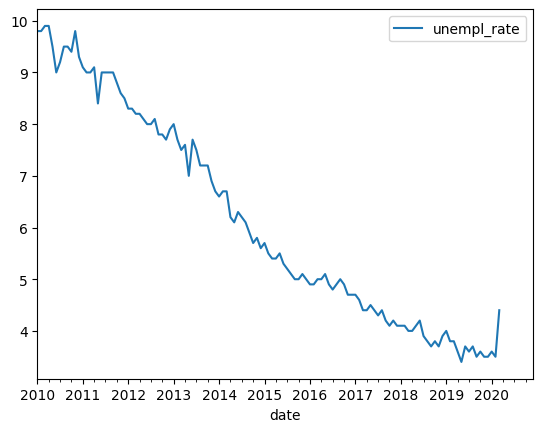

In [97]:
# Create date column
ur_tall['date'] = pd.to_datetime(
    ur_tall['year'].astype(str) + '-' + ur_tall['month'],
    format='%Y-%b'   # expects Jan, Feb, Mar ...
)

# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values(by = 'date', ascending=True)

# Using ur_sorted, plot unempl_rate on the y-axis and date on the x-axis
ur_sorted.plot(x='date', y='unempl_rate')
plt.show()

### Using .melt() for stocks vs bond performance
It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the .melt() method to reshape this table.

Additionally, you will use the .query() method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.

In [98]:
#import datasets
ten_yr = pd.read_excel('ten_yr.xlsx')
dji = pd.read_excel('dji.xlsx')

/var/folders/h1/63qltpj12zq4ms95z852hkg40000gn/T/ipykernel_7737/1184842484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bond_perc_close['date'] = pd.to_datetime(bond_perc_close['date'])


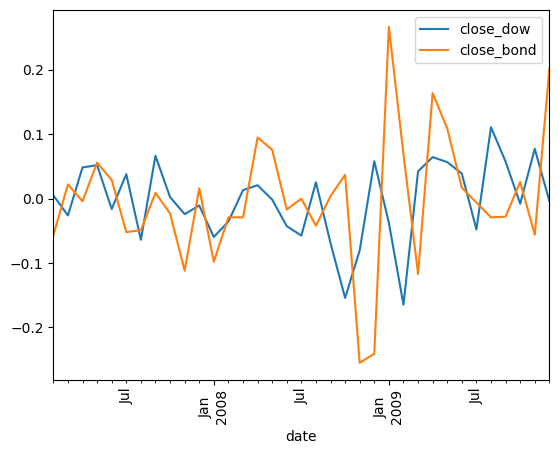

In [99]:
# Use .melt() on ten_yr to unpivot everything except the metric column, setting var_name='date' and value_name='close'. Save the result to bond_perc.
bond_perc = ten_yr.melt(id_vars = ['metric'],
                       var_name='date',
                       value_name='close')

# Using the .query() method, select only those rows were metric equals 'close', and save to bond_perc_close.
bond_perc_close = bond_perc.query('metric == "close"')

# convert to_datetime
bond_perc_close['date'] = pd.to_datetime(bond_perc_close['date'])


# Use merge_ordered() to merge dji (left table) and bond_perc_close on date with an inner join, and set suffixes equal to ('_dow', '_bond'). Save the result to dow_bond.
dow_bond = pd.merge_ordered(dji, bond_perc_close, 
                            on = 'date', 
                            how = 'inner', 
                            suffixes = ('_dow', '_bond'))


# Plot only the close_dow and close_bond columns
dow_bond.plot(y = ['close_dow', 'close_bond'], x='date', rot=90)
plt.show()